In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('railway.csv', encoding = 'unicode_escape')

In [3]:
df.shape

(23871, 17)

In [4]:
df.head(5)

,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,1.1.24,1:10:20,Station,Contactless,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,1.1.24,23:30:00,0:50:00,0:50:00,On Time,NaN,No
1,1.1.24,1:16:20,Online,Contactless,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,1.1.24,2:45:00,3:15:00,3:15:00,On Time,NaN,No
2,1.1.24,3:02:34,Station,Contactless,NaN,Standard,Off-Peak,12,London St Pancras,Birmingham New Street,1.1.24,4:30:00,5:50:00,5:50:00,On Time,NaN,No
3,1.1.24,3:03:49,Online,Credit Card,NaN,Standard,Off-Peak,33,Birmingham New Street,London St Pancras,1.1.24,4:30:00,5:50:00,5:50:00,On Time,NaN,No
4,1.1.24,3:35:48,Online,Credit Card,Adult,Standard,Off-Peak,3,Liverpool Lime Street,Manchester Piccadilly,1.1.24,5:00:00,5:30:00,5:30:00,On Time,NaN,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23871 entries, 0 to 23870
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date of Purchase     23871 non-null  object
 1   Time of Purchase     23871 non-null  object
 2   Purchase Type        23871 non-null  object
 3   Payment Method       23871 non-null  object
 4   Railcard             8085 non-null   object
 5   Ticket Class         23871 non-null  object
 6   Ticket Type          23871 non-null  object
 7   Price                23871 non-null  int64 
 8   Departure Station    23871 non-null  object
 9   Arrival Destination  23871 non-null  object
 10  Date of Journey      23871 non-null  object
 11  Departure Time       23871 non-null  object
 12  Arrival Time         23871 non-null  object
 13  Actual Arrival Time  22468 non-null  object
 14  Journey Status       23871 non-null  object
 15  Reason for Delay     3163 non-null   object
 16  Refu

In [6]:
pd.isnull(df).sum()

Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               15786
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1403
Journey Status             0
Reason for Delay       20708
Refund Request             0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(651, 17)

In [9]:
df['Price'] = df['Price'].astype('int')

In [10]:
df['Price'].dtypes

dtype('int64')

In [11]:
df.describe

<bound method NDFrame.describe of       Date of Purchase Time of Purchase Purchase Type Payment Method Railcard  \
85              2.1.24          4:47:49        Online    Contactless    Adult   
137             2.1.24          7:32:42       Station    Contactless    Adult   
138             2.1.24          7:33:03       Station    Contactless    Adult   
178             2.1.24         10:32:20       Station    Contactless    Adult   
183             2.1.24         10:51:36       Station     Debit Card    Adult   
...                ...              ...           ...            ...      ...   
23528          30.3.24         14:44:39       Station    Credit Card    Adult   
23529          30.3.24         14:44:54       Station    Credit Card    Adult   
23548          30.3.24         17:11:30       Station     Debit Card    Adult   
23691          31.3.24          7:37:24       Station    Contactless    Adult   
23724          31.3.24         10:54:23       Station     Debit Card    Adu

In [12]:
df.columns

Index(['Date of Purchase', 'Time of Purchase', 'Purchase Type',
       'Payment Method', 'Railcard', 'Ticket Class', 'Ticket Type', 'Price',
       'Departure Station', 'Arrival Destination', 'Date of Journey',
       'Departure Time', 'Arrival Time', 'Actual Arrival Time',
       'Journey Status', 'Reason for Delay', 'Refund Request'],
      dtype='object')

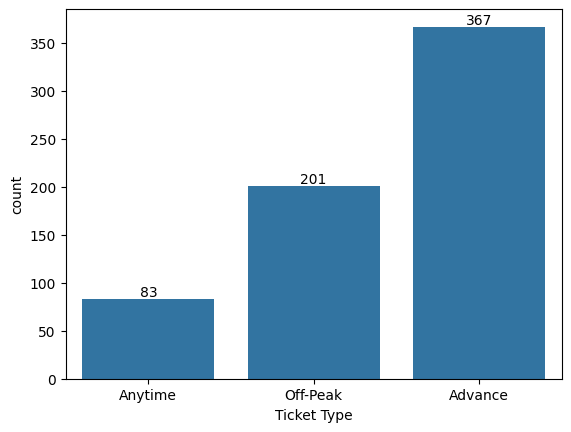

In [13]:
ax = sns.countplot(x = 'Ticket Type',data = df )
for bars in ax.containers:
    ax.bar_label(bars)

*From the above graph we can observe that tickets are booked more in advance*

<Axes: xlabel='Ticket Type', ylabel='Price'>

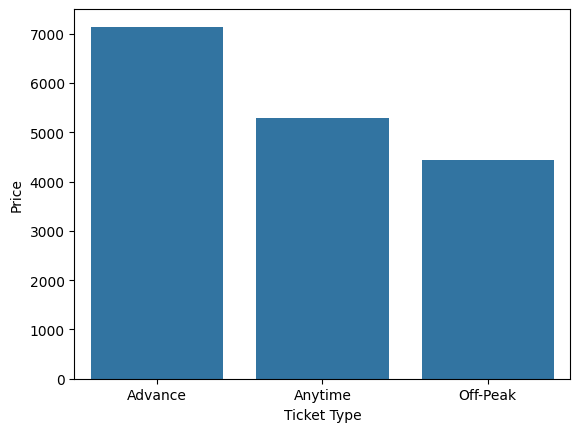

In [17]:
# plotting a bar chart for Ticket Type vs Price
sales_gen = df.groupby(['Ticket Type'], as_index=False)['Price'].sum().sort_values(by='Price', ascending=False)
sns.barplot(x = 'Ticket Type',y= 'Price' ,data = sales_gen)

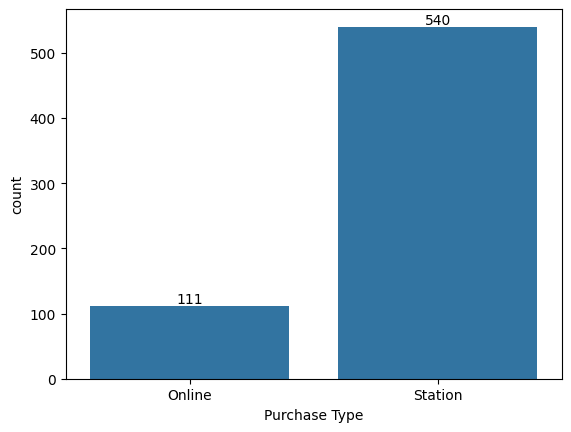

In [19]:
ax = sns.countplot(data = df, x = 'Purchase Type')

for bars in ax.containers:
    ax.bar_label(bars)

*From the above graph we can observe that people have bought tickets from station more than online*

<Axes: xlabel='Purchase Type', ylabel='Price'>

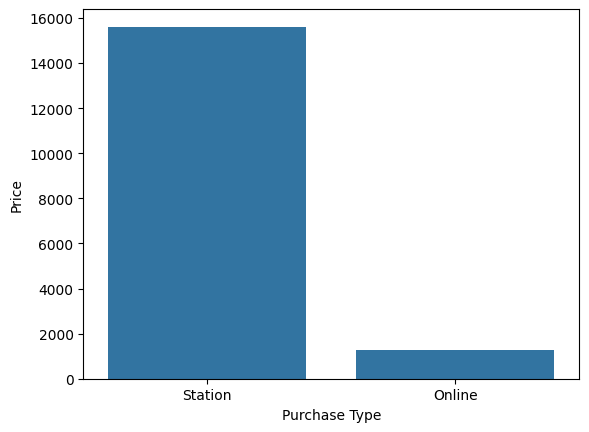

In [21]:
# Purchase Type vs Price
sales_age = df.groupby(['Purchase Type'], as_index=False)['Price'].sum().sort_values(by='Price', ascending=False)

sns.barplot(x = 'Purchase Type',y= 'Price' ,data = sales_age)

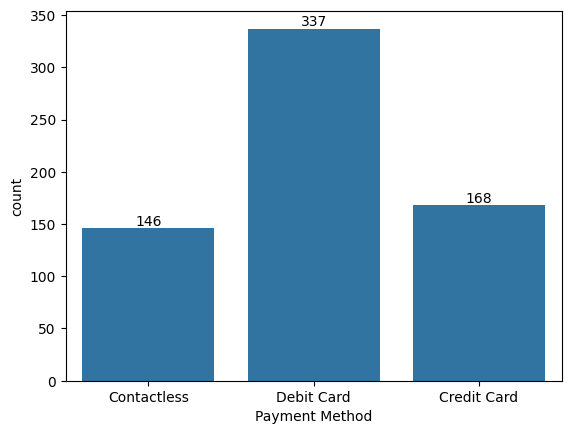

In [22]:
ax = sns.countplot(data = df, x = 'Payment Method')

for bars in ax.containers:
    ax.bar_label(bars)

*From the above graph we can observe that people have used debit card more than any other payment method*

<Axes: xlabel='Payment Method', ylabel='Price'>

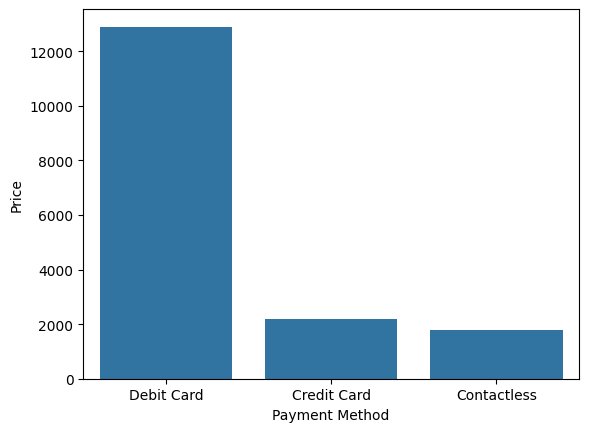

In [23]:
# Payment Method vs Price
sales_age = df.groupby(['Payment Method'], as_index=False)['Price'].sum().sort_values(by='Price', ascending=False)

sns.barplot(x = 'Payment Method',y= 'Price' ,data = sales_age)

*From the above graph we can observe that people have paid high price ticket through debit card*

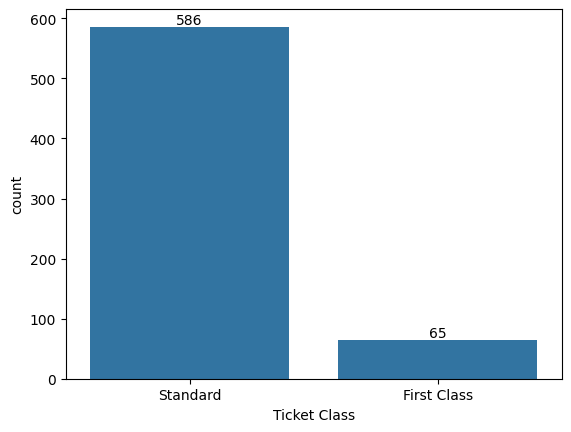

In [25]:
ax = sns.countplot(data = df, x = 'Ticket Class')

for bars in ax.containers:
    ax.bar_label(bars)

*From the above graph we can observe that people have opted for standard class more than first class*

## Conclusion:

###

From the analysis we came into a conclusion that people often book ticket in advance, mostly from station, through debit card and they prefer to travel in standard class